In [2]:
import pandas as pd

# READING THE DATASET

In [3]:
data = pd.read_csv('googleplaystore.csv')

## LOOKING AT THE ROWS AND COLUMNS IN THE DATASET AND CLEANING UNECCESARY DATA

In [4]:
data.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Unnamed: 14'],
      dtype='object')

In [5]:
data.rename(columns={'Unnamed: 0':'x',
                          'Unnamed: 14':'y'}, 
                 inplace=True)

In [6]:
t = data.drop(['x','y'],axis=1)

### This dataset contains `10841` rows and `13 ` columns

In [7]:
t.shape

(10841, 13)

### Names of columns in the dataset and I will mostly be looking at `GAME` category , `RATING`, and `Number of installs`

In [8]:
for names in t.columns:
    print(names)

App
Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver


### TOP 3 ROWS OF THE DATASET

In [9]:
t.head(3) 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0,Everyone,Art & Design,Pretend Play,"January 15, 2018",2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


### This DATASET was huge so I decided to filter to find `GAMES` that had `RATING` above `3.0` and Installs more than `10 Million`

In [10]:
game_data = (t.Category == 'GAME') & (t.Rating >= 3.0) & (t.Installs >= 10000000.0)

In [11]:
new = t[game_data]

### OUR FILTERED DATASET

In [12]:
new.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,1.000000e+08,Free,0,Everyone 10+,Adventure,Action & Adventure,"July 31, 2018",2.347.225742
1654,Subway Surfers,GAME,4.5,27722264,76M,1.000000e+09,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677,74M,5.000000e+08,Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1656,Solitaire,GAME,4.7,254258,23M,1.000000e+07,Free,0,Everyone,Card,"August 1, 2018",2.137.0,4.1 and up
1657,Bubble Shooter,GAME,4.5,148897,46M,1.000000e+07,Free,0,Everyone,Casual,"July 17, 2018",1.20.1,4.0.3 and up


### OUR FILTERED DATASET CONTAINS `466` ROWS AND `13` COLUMNS

In [13]:
new.shape

(466, 13)

### THIS TELLS US ABOUT `RATINGS` AND `INSTALLS` IN OUR FILTERED DATASET, FOR EXAMPLE MEAN RATING IS `4.4` AND MINIMUM RATING IS `3.3`

In [14]:
new.describe()

,Rating,Installs
count,466.000000,4.660000e+02
mean,4.408155,7.371245e+07
std,0.212557,1.413489e+08
min,3.300000,1.000000e+07
25%,4.300000,1.000000e+07
50%,4.400000,5.000000e+07
75%,4.500000,1.000000e+08
max,4.800000,1.000000e+09


### NOW I HAVE GROUPED GAMES BY `GENRE` TO FIND OUT THE TOP TEN CATEGORIES

In [15]:
x = new.groupby(['Genres']).App.agg(['count']).nlargest(10,'count')

### AS YOU CAN SEE THE MOST POPULAR CATEGORY IS `ACTION` ,`ARCADE` AND `RACING`

In [16]:
x

,count
Genres,
Action,156
Arcade,99
Casual,42
Racing,37
Puzzle,27
Adventure,21
Strategy,16
Sports,12
Word,12


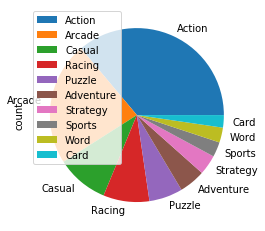

In [17]:
%matplotlib inline
x.plot.pie(y='count')

### NOW I WILL BE GROUPING DATA BY GENRES TO FIND OUT MORE ABOUT `ACTION` GAMES

In [18]:
y = new.groupby(['Genres'])

In [19]:
d = y.get_group(('Action'))

In [20]:
d.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1659,slither.io,GAME,4.4,5234162,Varies with device,100000000.0,Free,0,Everyone,Action,"November 14, 2017",Varies with device,2.3 and up
1661,Temple Run 2,GAME,4.3,8118609,62M,500000000.0,Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1663,Helix Jump,GAME,4.2,1497361,33M,100000000.0,Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up
1671,Kick the Buddy,GAME,4.3,1000417,Varies with device,50000000.0,Free,0,Teen,Action,"July 5, 2018",Varies with device,4.4 and up
1693,Zombie Catchers,GAME,4.7,990491,75M,10000000.0,Free,0,Everyone,Action,"May 24, 2018",1.0.27,4.1 and up


### MEAN RATING OF ACTION GAMES ONLY `4.3`

In [21]:
d.describe()

,Rating,Installs
count,156.000000,1.560000e+02
mean,4.396795,5.839744e+07
std,0.203651,9.591997e+07
min,3.600000,1.000000e+07
25%,4.300000,1.000000e+07
50%,4.400000,1.000000e+07
75%,4.500000,1.000000e+08
max,4.700000,5.000000e+08


In [22]:
g = d.nlargest(15,'Installs')

### TOP 15 action games by number of installs

In [23]:
g

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1661,Temple Run 2,GAME,4.3,8118609,62M,500000000.0,Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1729,Temple Run 2,GAME,4.3,8118937,62M,500000000.0,Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1759,Temple Run 2,GAME,4.3,8118937,62M,500000000.0,Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1886,Temple Run 2,GAME,4.3,8119151,62M,500000000.0,Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1920,Temple Run 2,GAME,4.3,8119154,62M,500000000.0,Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
4041,Temple Run 2,GAME,4.3,8116142,62M,500000000.0,Free,0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1659,slither.io,GAME,4.4,5234162,Varies with device,100000000.0,Free,0,Everyone,Action,"November 14, 2017",Varies with device,2.3 and up
1663,Helix Jump,GAME,4.2,1497361,33M,100000000.0,Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up
1699,Sniper 3D Gun Shooter: Free Shooting Games - FPS,GAME,4.6,7671249,Varies with device,100000000.0,Free,0,Mature 17+,Action,"August 2, 2018",Varies with device,Varies with device
1718,Garena Free Fire,GAME,4.5,5465624,53M,100000000.0,Free,0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up


###  THIS DESCRIBES MORE ABOUT OUR TOP 15 GAMES

In [24]:
g.describe()

,Rating,Installs
count,15.000000,1.500000e+01
mean,4.393333,2.600000e+08
std,0.148645,2.028370e+08
min,4.200000,1.000000e+08
25%,4.300000,1.000000e+08
50%,4.300000,1.000000e+08
75%,4.550000,5.000000e+08
max,4.600000,5.000000e+08
